Problem Statement :
The following data contains a compilation of all the development related courses ( 13k+ courses) which are available on Udemy's website. Create a model to predict the ratings for future courses if it contains following attributes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('udemy_output_All_Finance__Accounting_p1_p626.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


# Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [6]:
df.shape

(13608, 20)

In [7]:
df.isnull().sum()

id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1403
discount_price__currency        1403
discount_price__price_string    1403
price_detail__amount             497
price_detail__currency           497
price_detail__price_string       497
dtype: int64

CORRElation heatmap

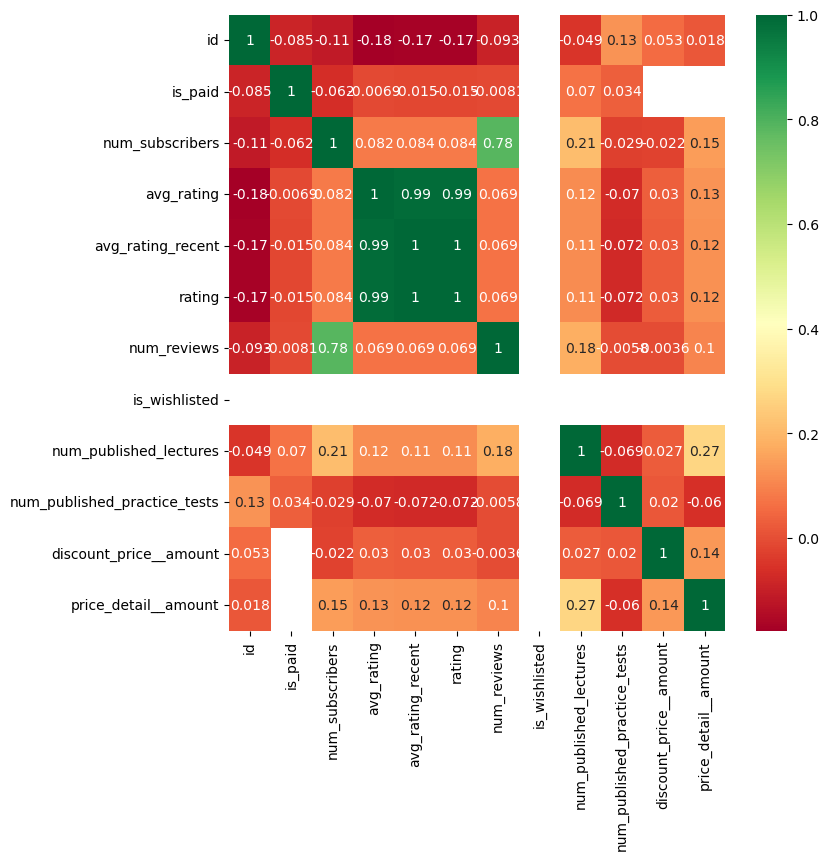

In [8]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()
            

num_subscribers and num_review have high correlation. Dropping num_review

rating and avg_rating correalted. dropping avg_rating

# Dropping unique identifiers and highly correlated features

In [9]:
df.drop(['id', 'title', 'url', 'num_reviews', 'avg_rating'], axis=1, inplace=True)

In [10]:
df.head()

,is_paid,num_subscribers,avg_rating_recent,rating,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,True,295509,4.67874,4.67874,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,True,209070,4.60015,4.60015,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,True,155282,4.59326,4.59326,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,True,245860,4.53772,4.53772,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,True,374836,4.47173,4.47173,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [11]:
df.dtypes

is_paid                            bool
num_subscribers                   int64
avg_rating_recent               float64
rating                          float64
is_wishlisted                      bool
num_published_lectures            int64
num_published_practice_tests      int64
created                          object
published_time                   object
discount_price__amount          float64
discount_price__currency         object
discount_price__price_string     object
price_detail__amount            float64
price_detail__currency           object
price_detail__price_string       object
dtype: object

In [12]:
df.select_dtypes(include=['object'])

,created,published_time,discount_price__currency,discount_price__price_string,price_detail__currency,price_detail__price_string
0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,INR,₹455,INR,"₹8,640"
1,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,INR,₹455,INR,"₹8,640"
2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,INR,₹455,INR,"₹8,640"
3,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,INR,₹455,INR,"₹8,640"
4,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,INR,₹455,INR,"₹8,640"
...,...,...,...,...,...,...
13603,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,NaN,NaN,NaN,NaN
13604,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,NaN,NaN,NaN,NaN
13605,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,NaN,NaN,NaN,NaN
13606,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,NaN,NaN,NaN,NaN


In [13]:
df['discount_price__currency'].unique()

array(['INR', nan], dtype=object)

In [14]:
df['price_detail__currency'].unique()

array(['INR', nan], dtype=object)

Both have 2 categories with 1 nan value.. so its better to drop both features

In [15]:
df.drop(['discount_price__currency', 'price_detail__currency'], axis=1, inplace=True)
df.head()

,is_paid,num_subscribers,avg_rating_recent,rating,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__price_string,price_detail__amount,price_detail__price_string
0,True,295509,4.67874,4.67874,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,₹455,8640.0,"₹8,640"
1,True,209070,4.60015,4.60015,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,₹455,8640.0,"₹8,640"
2,True,155282,4.59326,4.59326,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,₹455,8640.0,"₹8,640"
3,True,245860,4.53772,4.53772,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,₹455,8640.0,"₹8,640"
4,True,374836,4.47173,4.47173,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,₹455,8640.0,"₹8,640"


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   is_paid                       13608 non-null  bool   
 1   num_subscribers               13608 non-null  int64  
 2   avg_rating_recent             13608 non-null  float64
 3   rating                        13608 non-null  float64
 4   is_wishlisted                 13608 non-null  bool   
 5   num_published_lectures        13608 non-null  int64  
 6   num_published_practice_tests  13608 non-null  int64  
 7   created                       13608 non-null  object 
 8   published_time                13608 non-null  object 
 9   discount_price__amount        12205 non-null  float64
 10  discount_price__price_string  12205 non-null  object 
 11  price_detail__amount          13111 non-null  float64
 12  price_detail__price_string    13111 non-null  object 
dtypes

In [17]:
df['is_paid'].unique()

array([ True, False])

Check for null values

In [18]:
df.isnull().sum()

is_paid                            0
num_subscribers                    0
avg_rating_recent                  0
rating                             0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1403
discount_price__price_string    1403
price_detail__amount             497
price_detail__price_string       497
dtype: int64

1. discountPriceAmount and discountPricePriceString has similar values
2. priceDetailsAmount and priceDetailsPriceString has similar values

Hence dropping 1 of them

In [19]:
df.drop(['discount_price__price_string', 'price_detail__price_string'], axis=1, inplace=True)
df.head()

,is_paid,num_subscribers,avg_rating_recent,rating,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount
0,True,295509,4.67874,4.67874,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,8640.0
1,True,209070,4.60015,4.60015,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,8640.0
2,True,155282,4.59326,4.59326,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,8640.0
3,True,245860,4.53772,4.53772,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,8640.0
4,True,374836,4.47173,4.47173,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,8640.0


In [20]:
df.isnull().sum()

is_paid                            0
num_subscribers                    0
avg_rating_recent                  0
rating                             0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1403
price_detail__amount             497
dtype: int64

Replacing nan values with respective mean values

In [21]:
df['discount_price__amount'] = df['discount_price__amount'].fillna(df['discount_price__amount'].mean())
df['price_detail__amount'] = df['price_detail__amount'].fillna(df['price_detail__amount'].mean())

In [22]:
df.isnull().sum()

is_paid                         0
num_subscribers                 0
avg_rating_recent               0
rating                          0
is_wishlisted                   0
num_published_lectures          0
num_published_practice_tests    0
created                         0
published_time                  0
discount_price__amount          0
price_detail__amount            0
dtype: int64

# Null values have been replaced with mean.
## Handling created and published time now

In [23]:
df['created_year'] = df['created'].apply( lambda x : x[0:4]).astype(np.int64)
df['created_month'] = df['created'].apply(lambda x : x[5:7]).astype(np.int64)

df['published_year'] = df['published_time'].apply( lambda x : x[0:4]).astype(np.int64)
df['published_month'] = df['published_time'].apply(lambda x : x[5:7]).astype(np.int64)

In [24]:

df.drop(['created', 'published_time'], axis=1, inplace=True)

In [25]:
df.head()

,is_paid,num_subscribers,avg_rating_recent,rating,is_wishlisted,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,created_year,created_month,published_year,published_month
0,True,295509,4.67874,4.67874,False,84,0,455.0,8640.0,2016,2,2016,4
1,True,209070,4.60015,4.60015,False,78,0,455.0,8640.0,2016,8,2016,8
2,True,155282,4.59326,4.59326,False,292,2,455.0,8640.0,2017,9,2017,11
3,True,245860,4.53772,4.53772,False,338,0,455.0,8640.0,2015,10,2016,1
4,True,374836,4.47173,4.47173,False,83,0,455.0,8640.0,2015,10,2016,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   is_paid                       13608 non-null  bool   
 1   num_subscribers               13608 non-null  int64  
 2   avg_rating_recent             13608 non-null  float64
 3   rating                        13608 non-null  float64
 4   is_wishlisted                 13608 non-null  bool   
 5   num_published_lectures        13608 non-null  int64  
 6   num_published_practice_tests  13608 non-null  int64  
 7   discount_price__amount        13608 non-null  float64
 8   price_detail__amount          13608 non-null  float64
 9   created_year                  13608 non-null  int64  
 10  created_month                 13608 non-null  int64  
 11  published_year                13608 non-null  int64  
 12  published_month               13608 non-null  int64  
dtypes

# Converting bool values of is_paid and is_wishlisted into int using numpy

In [27]:

df['is_paid'] = df['is_paid'].astype(np.int64)
df['is_wishlisted'] = df['is_wishlisted'].astype(np.int64)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   is_paid                       13608 non-null  int64  
 1   num_subscribers               13608 non-null  int64  
 2   avg_rating_recent             13608 non-null  float64
 3   rating                        13608 non-null  float64
 4   is_wishlisted                 13608 non-null  int64  
 5   num_published_lectures        13608 non-null  int64  
 6   num_published_practice_tests  13608 non-null  int64  
 7   discount_price__amount        13608 non-null  float64
 8   price_detail__amount          13608 non-null  float64
 9   created_year                  13608 non-null  int64  
 10  created_month                 13608 non-null  int64  
 11  published_year                13608 non-null  int64  
 12  published_month               13608 non-null  int64  
dtypes

In [29]:
sum(df.dtypes == 'object')

0

All Dtypes of object types are handeled

# Outliers 

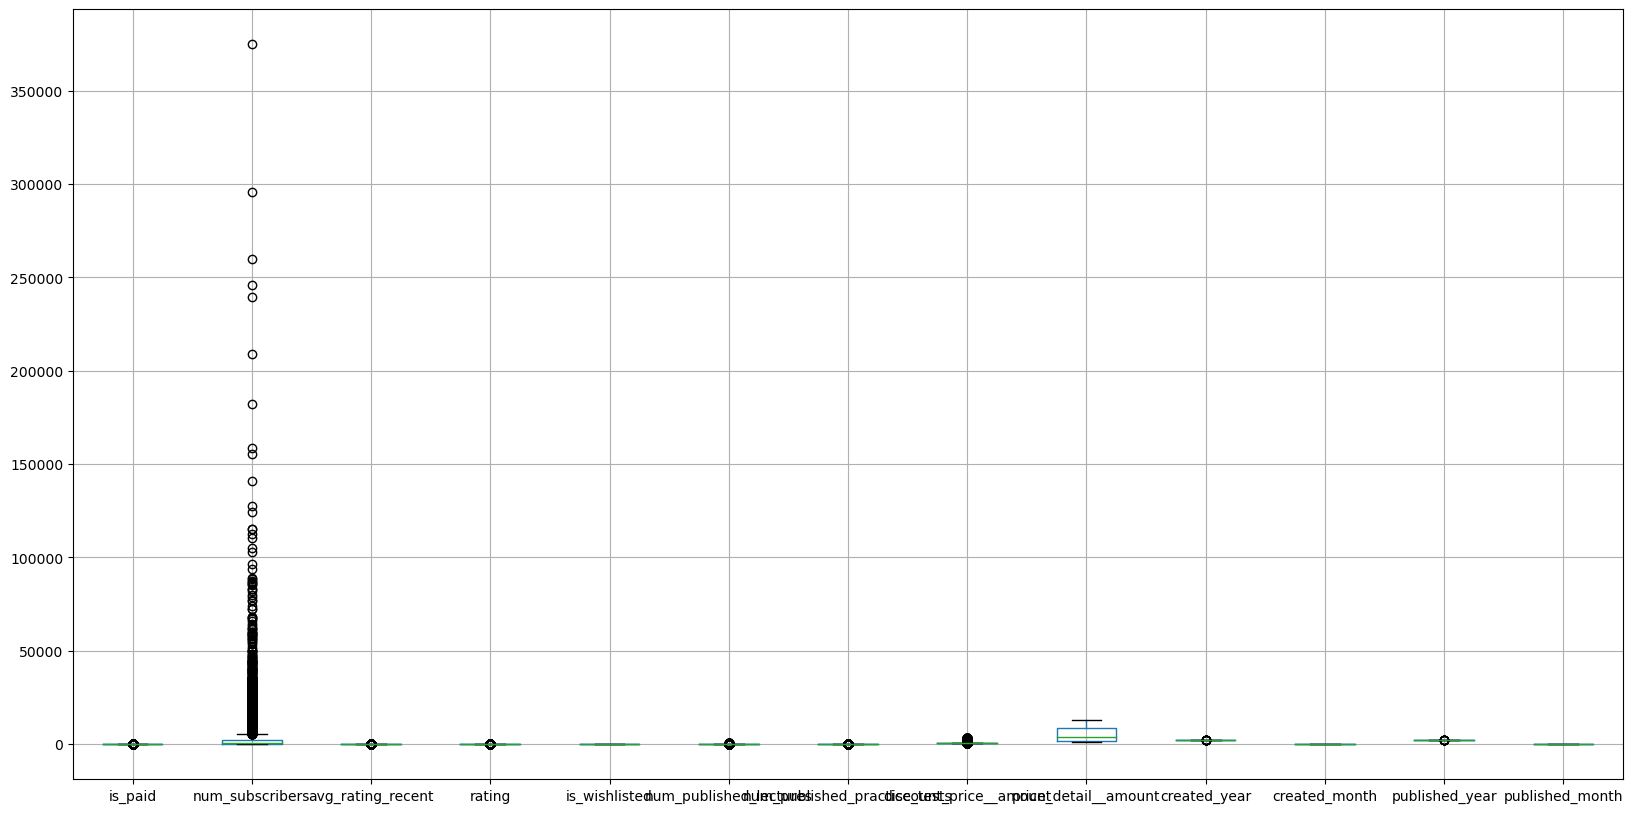

In [30]:
plt.figure(figsize=(20,10))

df.boxplot()
plt.show()

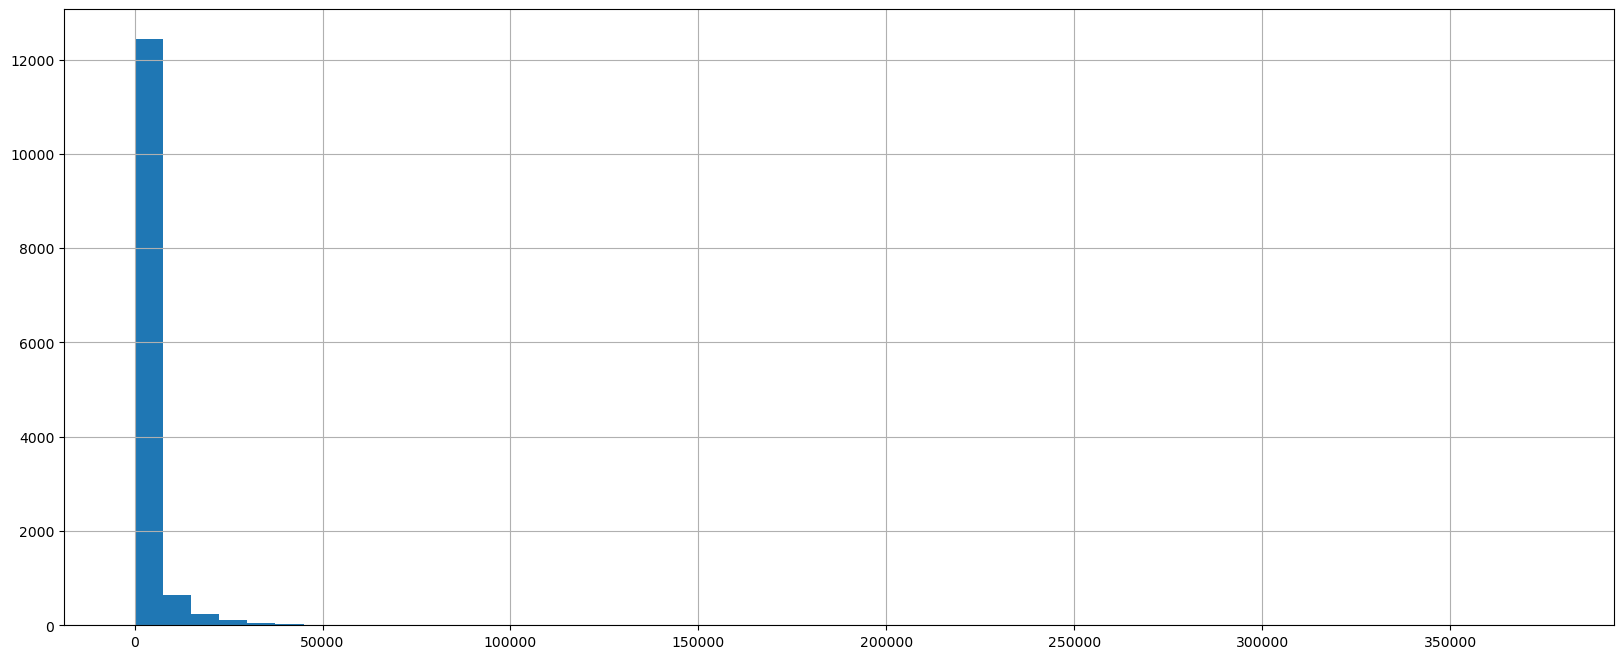

In [31]:
plt.figure(figsize=(20, 8))

df['num_subscribers'].hist(bins=50)
plt.show()

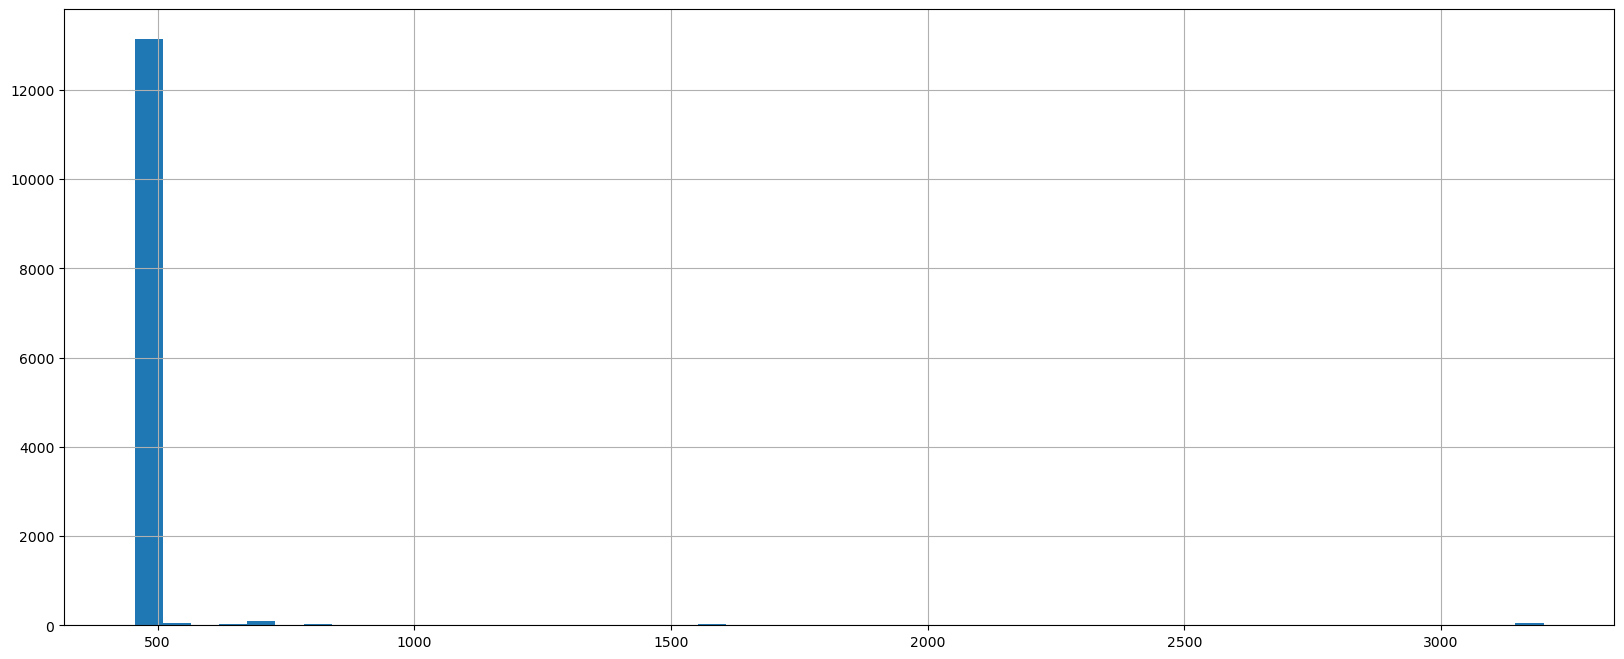

In [32]:
plt.figure(figsize=(20, 8))

df['discount_price__amount'].hist(bins=50)
plt.show()

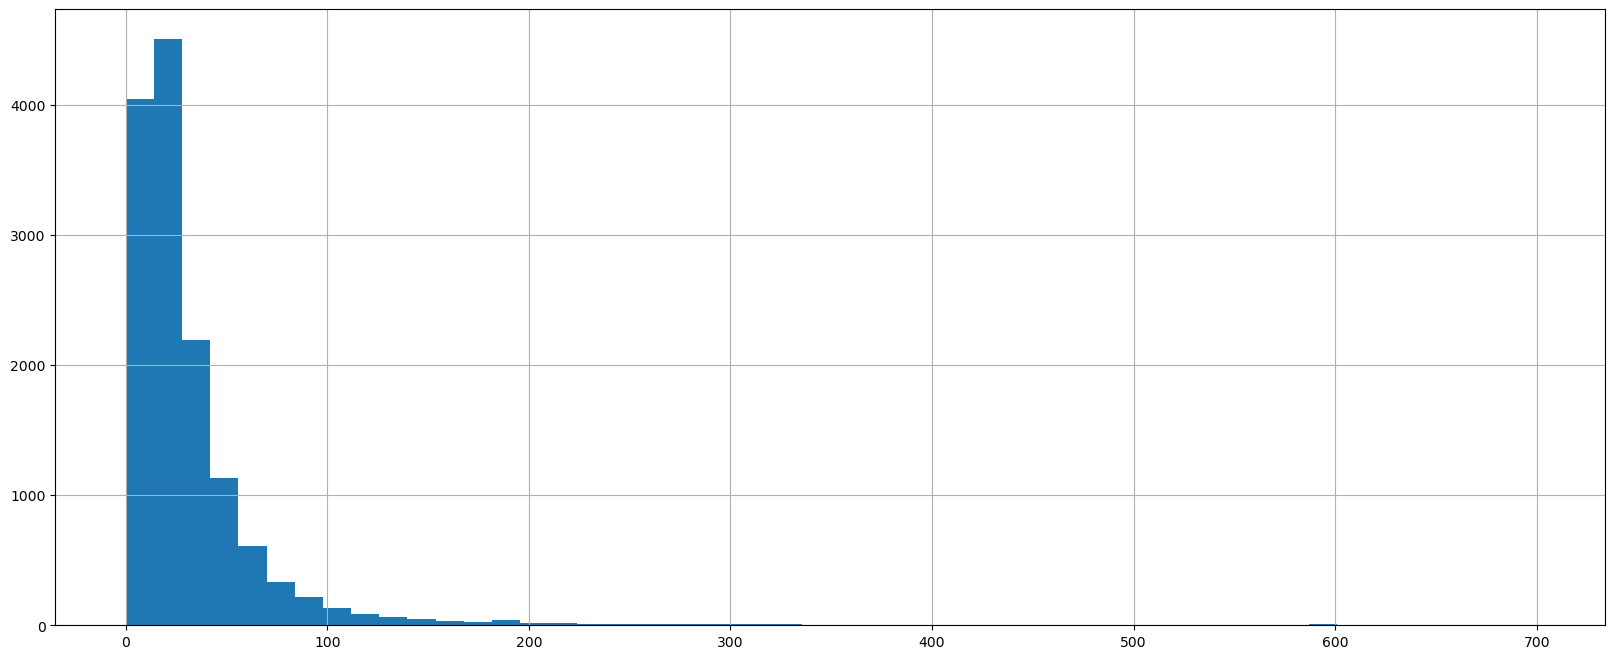

In [33]:

plt.figure(figsize=(20, 8))

df['num_published_lectures'].hist(bins=50)
plt.show()

Features with outliers :
1) num_subscribers

2) discount_price__amount

3) num_published_lectures

In [34]:
def iqr_outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    lower_boundary = q1 - 1.5 *q1
    upper_boundary = q3 + 1.5 * q3
    
    df.loc[df[column] >= upper_boundary, column] = upper_boundary
    df.loc[df[column] <= lower_boundary, column] = lower_boundary

In [35]:
iqr_outlier(df, 'num_subscribers')

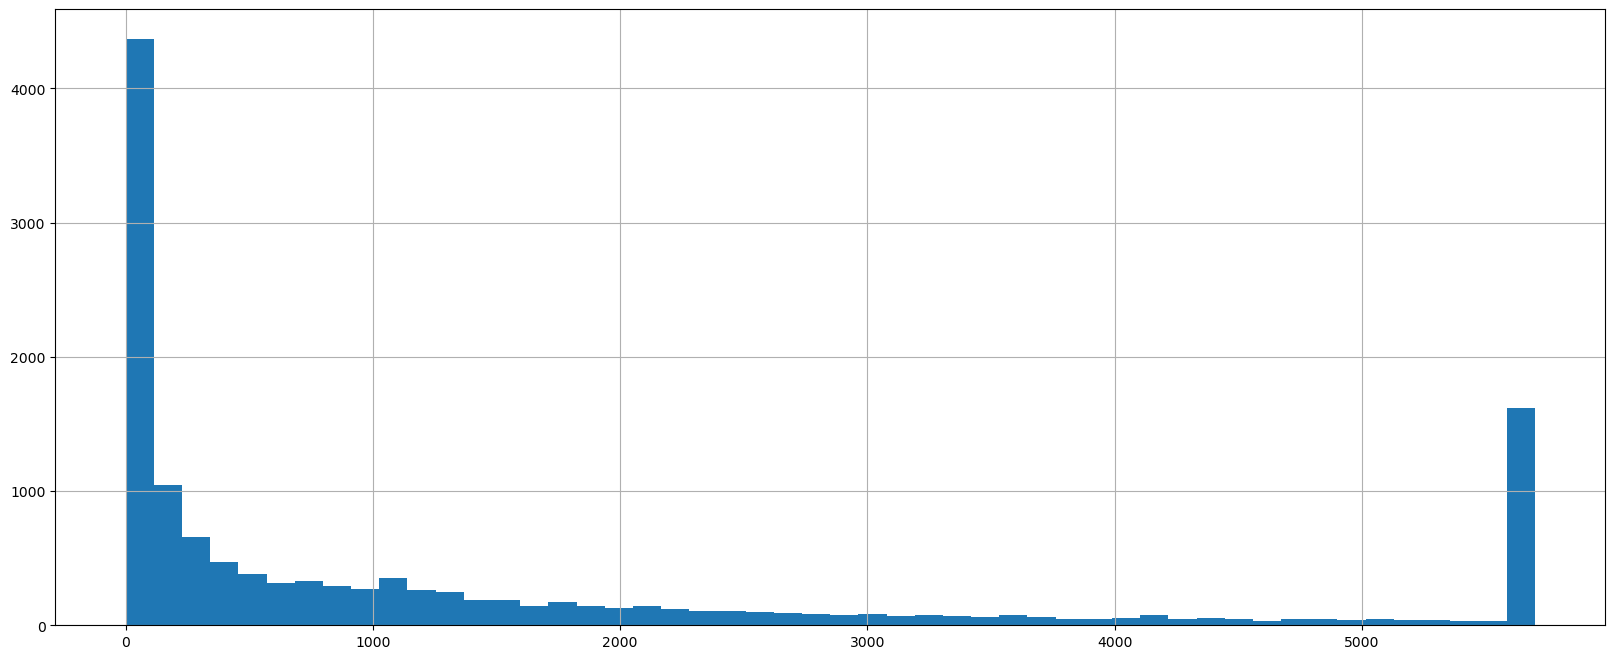

In [36]:
plt.figure(figsize=(20,8))
df['num_subscribers'].hist(bins=50)
plt.show()

In [37]:
iqr_outlier(df, 'discount_price__amount')

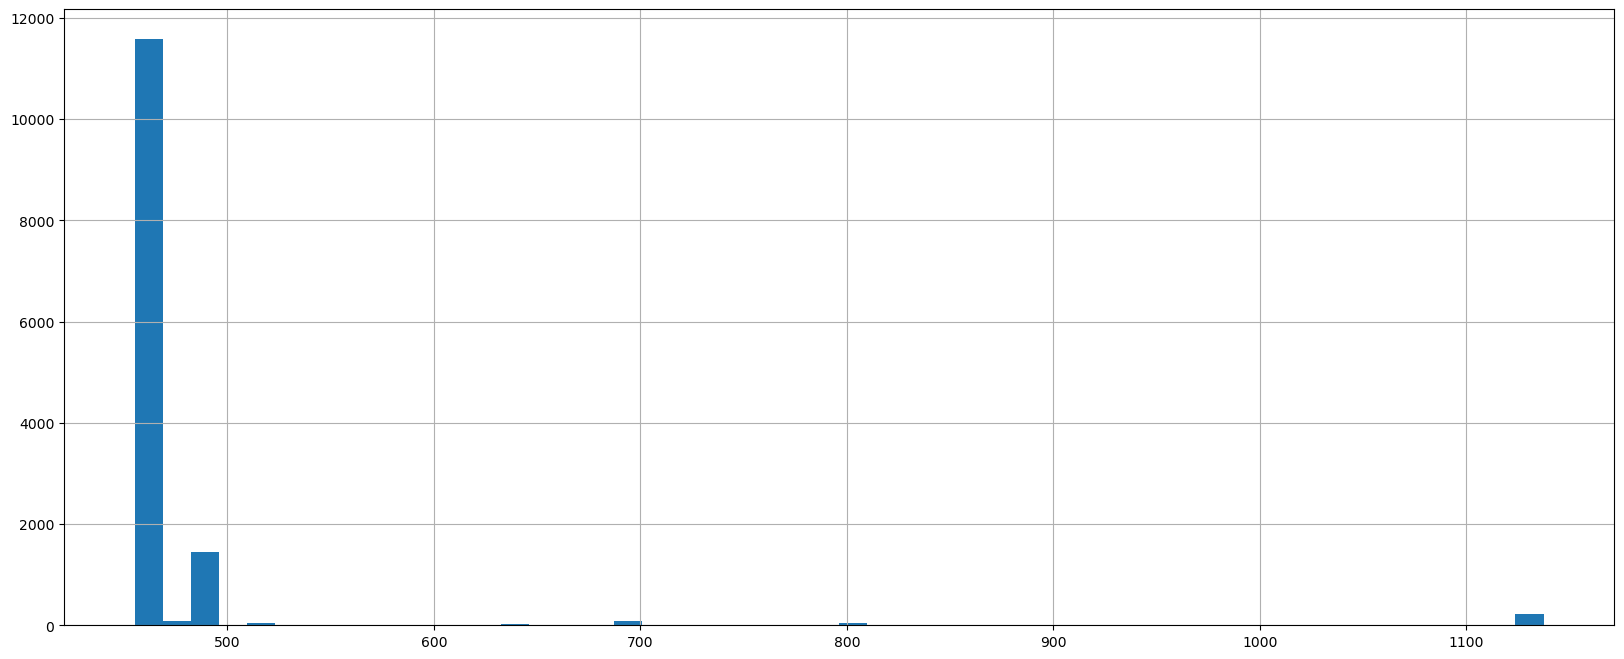

In [38]:
plt.figure(figsize=(20,8))
df['discount_price__amount'].hist(bins=50)
plt.show()

In [39]:
iqr_outlier(df, 'num_published_lectures')


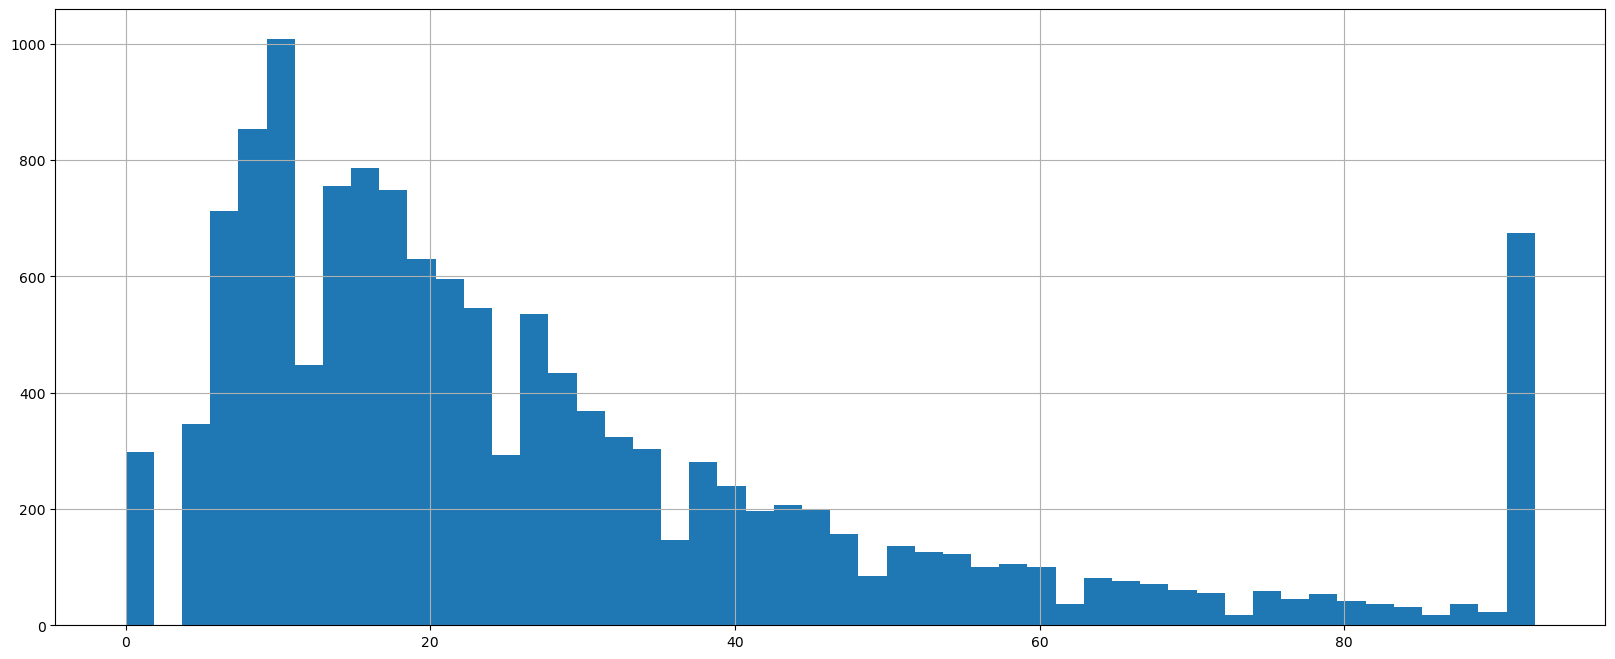

In [40]:
plt.figure(figsize=(20,8))
df['num_published_lectures'].hist(bins=50)
plt.show()

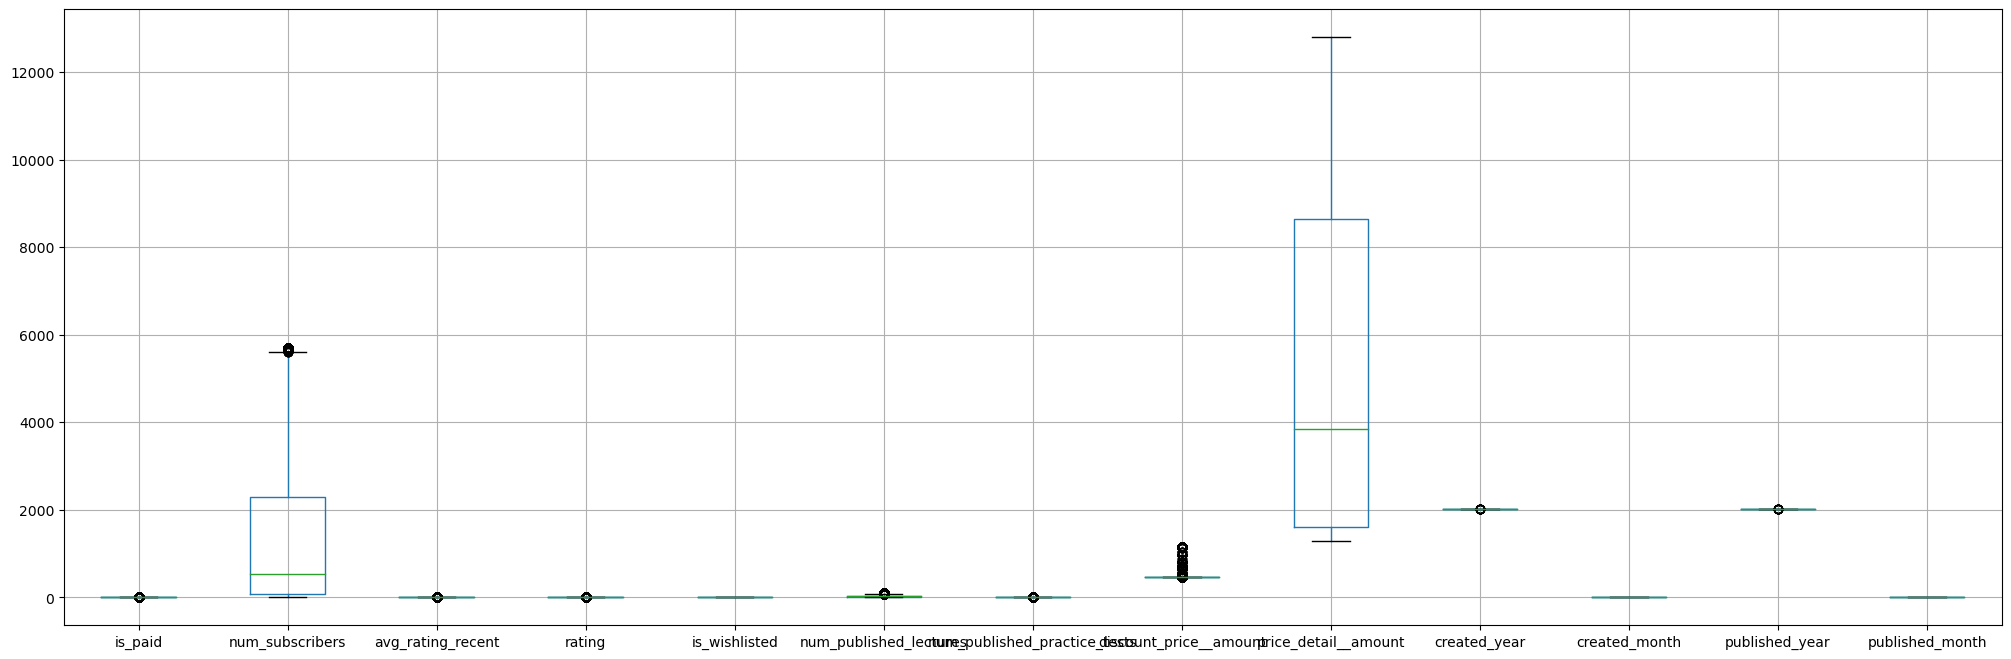

In [41]:

plt.figure(figsize=(25, 8))

df.boxplot()
plt.show()

# Train test split

In [42]:
X = df.copy()

In [43]:
X.drop(['rating'], axis=1, inplace=True)
X.head()

,is_paid,num_subscribers,avg_rating_recent,is_wishlisted,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,created_year,created_month,published_year,published_month
0,1,5698.75,4.67874,0,84.0,0,455.0,8640.0,2016,2,2016,4
1,1,5698.75,4.60015,0,78.0,0,455.0,8640.0,2016,8,2016,8
2,1,5698.75,4.59326,0,92.5,2,455.0,8640.0,2017,9,2017,11
3,1,5698.75,4.53772,0,92.5,0,455.0,8640.0,2015,10,2016,1
4,1,5698.75,4.47173,0,83.0,0,455.0,8640.0,2015,10,2016,1


In [44]:
y = df['rating']
y.head()

0    4.67874
1    4.60015
2    4.59326
3    4.53772
4    4.47173
Name: rating, dtype: float64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature Scaling : Standardizing

In [46]:
sc = StandardScaler()

In [47]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [48]:
#Standardized training dataset

In [49]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.head()

,is_paid,num_subscribers,avg_rating_recent,is_wishlisted,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,created_year,created_month,published_year,published_month
0,0.190725,-0.771875,-1.283361,0.0,-0.799923,-0.174798,-0.20967,-0.896401,1.270802,-0.967484,1.222923,-0.988510
1,0.190725,0.264999,0.610046,0.0,-0.230054,-0.174798,-0.20967,1.303051,-0.222034,1.096010,0.717580,-1.287117
2,0.190725,-0.761116,-0.062968,0.0,-0.843759,-0.174798,-0.20967,-0.372722,1.270802,-0.672699,1.222923,-0.391297
3,0.190725,-0.773924,0.754981,0.0,1.654896,-0.174798,-0.20967,-0.686929,1.270802,-0.672699,1.222923,-0.391297
4,0.190725,-0.320548,0.500787,0.0,-0.361562,-0.174798,-0.20967,-0.686929,-1.714870,0.211655,-1.809137,0.504523


In [50]:
#Standardized test data
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test.head()

,is_paid,num_subscribers,avg_rating_recent,is_wishlisted,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,created_year,created_month,published_year,published_month
0,0.20196,-0.742630,-0.582506,0.0,-0.769323,-0.182328,-0.221270,-1.098188,-0.208315,-0.667326,-0.281808,-0.696501
1,0.20196,-0.728415,0.271842,0.0,-0.769323,-0.182328,0.169821,2.686100,-0.208315,0.818967,-0.281808,0.801289
2,0.20196,1.525135,0.493086,0.0,-0.339646,-0.182328,-0.090718,0.058122,-0.703835,1.710744,-0.281808,-1.595175
3,0.20196,0.331094,0.710034,0.0,-0.855258,-0.182328,-0.221270,-0.467473,0.782725,0.818967,0.725034,1.100847
4,0.20196,-0.362385,0.761750,0.0,-0.511517,-0.182328,-0.221270,-0.993069,-1.694875,-0.667326,-1.792070,-0.396943


### Model Training

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
lr.score(X_test, y_test)

0.9988591173786171

# Here we are getting very high value for RSquared because the 'avg_rating_recent' feature is identical to the O/p feature 'rating' and hence helps the model to train better
But if we drop this feature 'avg_rating_recent', our RSquared reduces dramatically


In [55]:
mse = mean_squared_error(X_test, y_test)
#print(mse)

ValueError: y_true and y_pred have different number of output (12!=1)